# Import Libs and Mount Google Drive

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


## Create AR(1) model

In [37]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.5
w_std = 1.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2022-05-01', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2022-05-01,2022-05-01,0.000000
2022-05-02,2022-05-02,-1.423825
2022-05-03,2022-05-03,0.551816
2022-05-04,2022-05-04,-0.594754
2022-05-05,2022-05-05,-0.556550
...,...,...
2022-11-12,2022-11-12,0.035000
2022-11-13,2022-11-13,0.703682
2022-11-14,2022-11-14,1.566846
2022-11-15,2022-11-15,0.999482


Curiously there is some corelation

# Import Libries to Support ACF

In [38]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



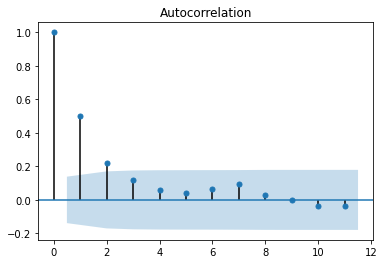

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726 -0.03478847]


In [39]:
nlag = 11
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

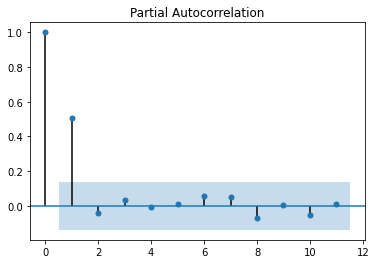

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122  0.00975221]


In [41]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

# Analysis

At 0 the highest corelation exists - as the element of X is being compared with itself.  In ACF, we see that the prior value has =~ 50% corelation with the current element, in PACF it too is about 50%.  However, ACF and PACF differ greatly after the first element.  This is due to how the corrections work.  For PACF, only that element and the prior element are evaulated for corelation, while ACF examines the steps between.  Because the intervening steps do add some influence, it appears that there is a higher corelation, until the model sharply changes course (as we see around 8 elements out).